### Ejercicio 4


### Imports

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

### Pipeline

1.   Load data
2.   Extract features
3.   Clustering to assign value categories
4.   Prepare data for the classification model
5.   Build the Keras model
6.   Train the model



In [4]:
# Load the data
data = pd.read_excel('/content/data_customer_classification.xlsx')
data['trans_date'] = pd.to_datetime(data['trans_date'])

# Extract features
customer_features = data.groupby('customer_id').agg(
    shopping_frequency=('customer_id', 'count'),
    average_spending=('tran_amount', 'mean'),
    max_spending=('tran_amount', 'max')
).reset_index()

# Clustering to assign value categories
num_clusters = 3
X = customer_features[['shopping_frequency', 'average_spending', 'max_spending']]
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
customer_features['value_category'] = kmeans.labels_

# Prepare data for the classification model
X = customer_features[['shopping_frequency', 'average_spending', 'max_spending']]
y = customer_features['value_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_categorical = to_categorical(y_train, num_classes=num_clusters)
y_test_categorical = to_categorical(y_test, num_classes=num_clusters)

# Build the Keras model
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_clusters, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Train the model
history = model.fit(X_train_scaled, y_train_categorical, epochs=50, batch_size=10, validation_split=0.1, verbose=1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                128       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 3)                 51        
                                                                 
Total params: 707 (2.76 KB)
Trainable params: 707 (2.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
496/496 [==============================] - 2s 2ms/step - loss: 0.4334 - accuracy: 0.8018 - val_loss: 0.1796 - val_accuracy: 0.9547
Epoch 2/50
496/496 [==============================] - 1s 2ms/step - loss: 0.1356 - accuracy: 0.9593 - val_loss: 0.0786 - val_accuracy: 0.9837
Epoc

### Evaluate the model

In [5]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=0)

print(f'Model Loss: {loss}')
print(f'Model Accuracy: {accuracy}')

Model Loss: 0.021050769835710526
Model Accuracy: 0.9891146421432495


### Plot results

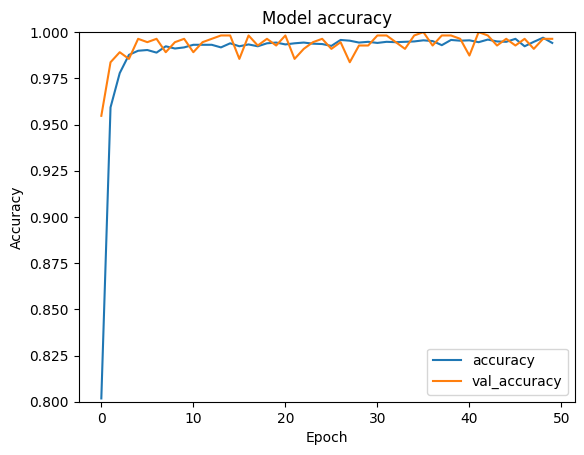

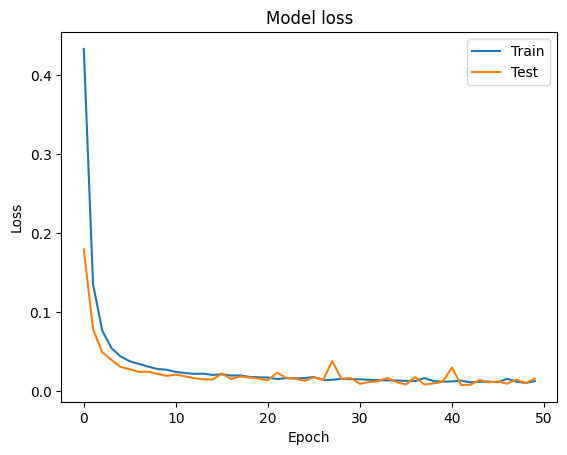

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

### Confusion matrix

In [9]:
outputTest = model.predict(X_test_scaled)
# X_test_scaled, y_test_categorical
print(outputTest[0])
print(outputTest[0].argmax(axis = 0))

44/44 [==============================] - 0s 5ms/step
[9.9999994e-01 1.8147477e-09 1.8360399e-18]
0


In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_categorical.argmax(axis=1),outputTest.argmax(axis=1))

print(cm)

[[424   1  14]
 [  0 373   0]
 [  0   0 566]]


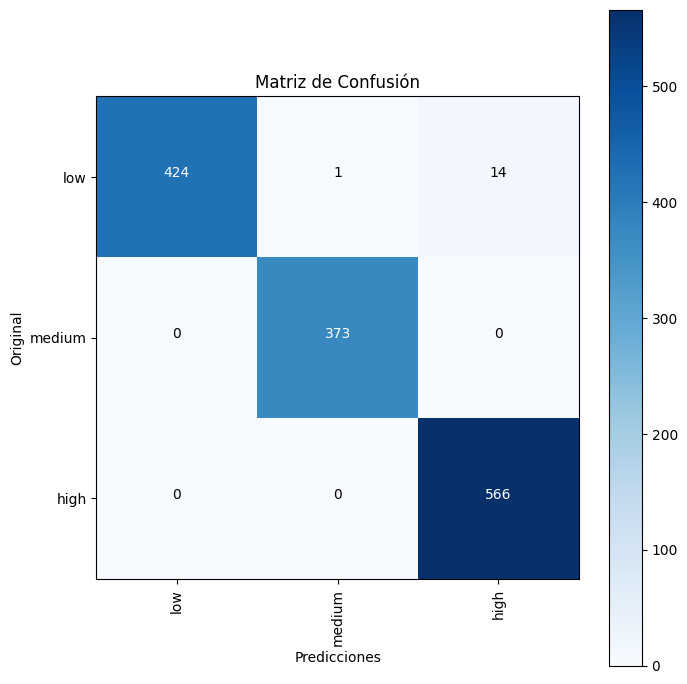

In [16]:
import numpy as np

def plot_confusion_matrix(cm, num_classes,normalize=False,title='Matriz de Confusión',cmap=plt.cm.Blues):

      import itertools

      classes = ['low', 'medium', 'high']

      plt.figure(figsize = (7,7))
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation=90)
      plt.yticks(tick_marks, classes)
      if normalize:
          cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

      thresh = cm.max() / 2.
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, cm[i, j],
                   horizontalalignment="center",
                   color="white" if cm[i, j] > thresh else "black")
      plt.tight_layout()
      plt.ylabel('Original')
      plt.xlabel('Predicciones')

plot_confusion_matrix(cm, 3)